In [2]:
import xarray as xr
import os
import pandas as pd
import tqdm
import dask
from dask.delayed import delayed
from dask.diagnostics import ProgressBar
from collections import OrderedDict
from itertools import product
import os
from netCDF4 import Dataset
from cdo import *   # python version
cdo = Cdo()
import matplotlib.pylab as plt
%matplotlib inline

In [43]:
# parameters cell
input_paths = ['/p/scratch/chhb19/jstreffi/runtime/awicm-3.1/TIME/outdata/oifs/links/']
input_names = ['TIME']

ctrl_input_paths = ['/p/scratch/chhb19/jstreffi/runtime/awicm-3.1/SPIN_drymassfixer/outdata/oifs/links/']
ctrl_input_names = ['PICT']

climatology_path = ['/p/project/chhb19/streffing1/obs/era5/netcdf/']
climatology_names = ['ERA5']

exps = range(1, 3)
exps_ctrl = map(lambda x: x + 25, range(9))
figsize=(10, 5)
dpi = 200
var = 'SKT'

In [44]:
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    beta=10
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

In [45]:
# Load HIST Data

data = OrderedDict()
v=var
paths = []
data[v] = []
for exp in tqdm.tqdm(exps):
    path = input_paths[0]+'/'+v+'_'+f'{exp:05d}.nc'
    data[v].append(cdo.yearmean(input="-fldmean "+str(path),returnArray=v))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


In [46]:
# Load PICT Data

ctrl_data = OrderedDict()
v=var
ctrl_paths = []
ctrl_data[v] = []
for exp in tqdm.tqdm(map(lambda x: x + 25, range(9))):
    ctrl_path = ctrl_input_paths[0]+'/'+v+'_'+f'{exp:05d}.nc'
    ctrl_data[v].append(cdo.yearmean(input="-fldmean "+str(ctrl_path),returnArray=v))

9it [00:05,  1.58it/s]


In [47]:
erapath = climatology_path[0]+'/'+var+'_mon.nc'
era5 = cdo.yearmean(input="-fldmean "+str(path),returnArray=v)

In [48]:
# extract data
hist = np.squeeze(data['SKT']).flatten()
pict = np.squeeze(ctrl_data['SKT']).flatten()
pict = pict[0:len(hist)]

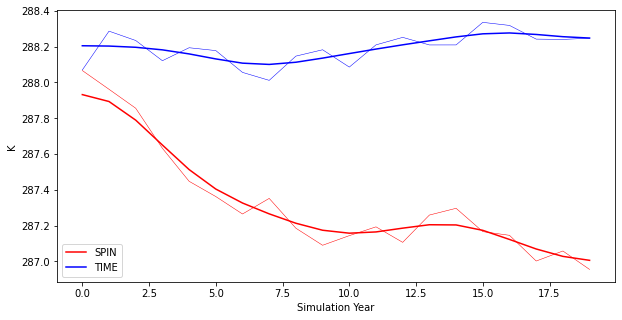

In [49]:
fig, axes = plt.subplots(figsize=figsize)

plt.plot(smooth(hist,len(hist)),color='red')
plt.plot(smooth(pict,len(pict)),color='blue')

plt.plot(hist,linewidth=0.5,color='red')
plt.plot(pict,linewidth=0.5,color='blue')

plt.ylabel('K')
plt.xlabel('Simulation Year')

axes.legend(['SPIN', 'TIME'])


Text(0.5, 0, 'Simulation Year')

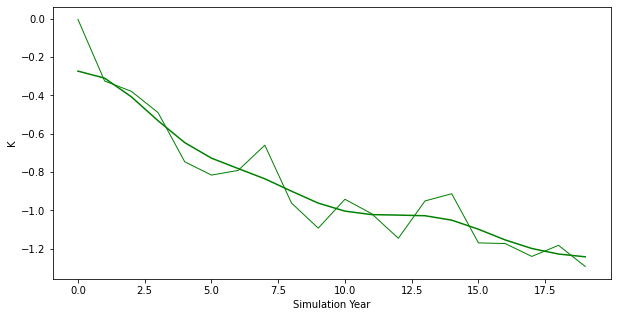

In [50]:
fig, axes = plt.subplots(figsize=figsize)

plt.plot(smooth(hist-pict,len(hist-pict)),color='green')
plt.plot(hist-pict,linewidth=1,color='green')


plt.ylabel('K')
plt.xlabel('Simulation Year')